Installing required directories

In [ ]:
!pip install openpyxl

importing libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/EastWestAirlines_data.csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
print(df.isnull().sum())

ID#                  3999
Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
Award?               3999
dtype: int64


In [ ]:
print(df.count())

ID#                  3999
Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
Award?               3999
dtype: int64


In [ ]:
data = df.drop_duplicates()

In [ ]:
print(df.count()) #so no duplicated (verified by this step)

ID#                  3999
Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
Award?               3999
dtype: int64


In [ ]:
# Basic statistics of the dataset after dropping duplicates
print("Basic statistics of the dataset after dropping duplicates:")
print(df.describe())

Basic statistics of the dataset after dropping duplicates:
               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381   

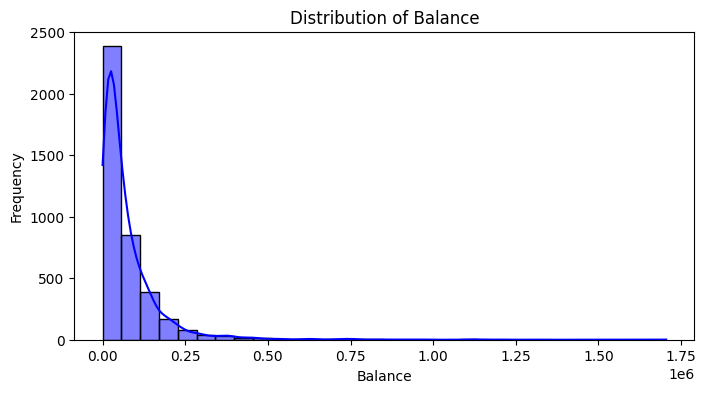

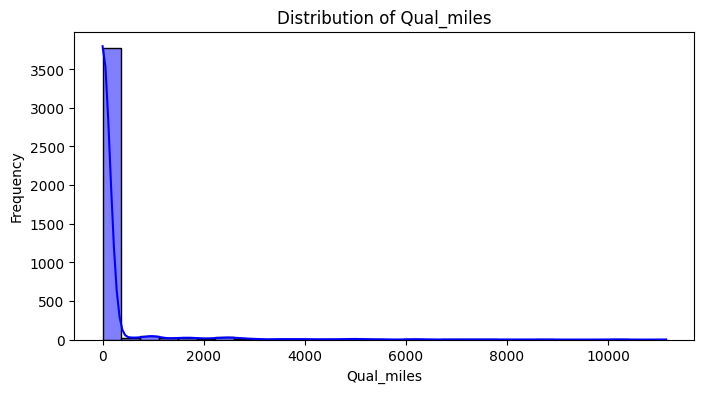

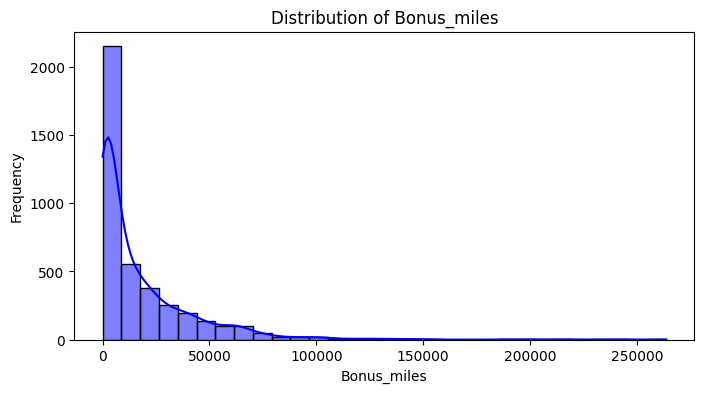

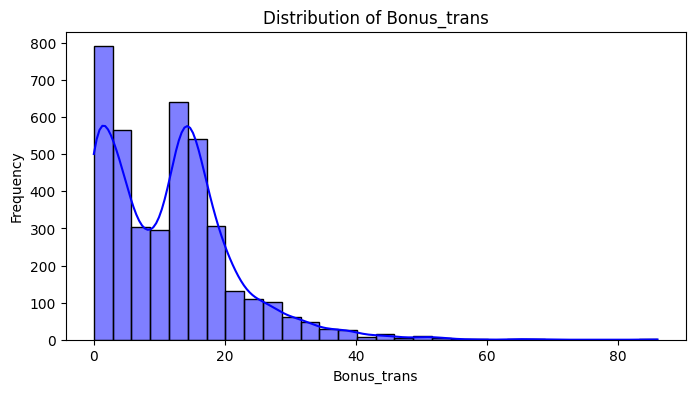

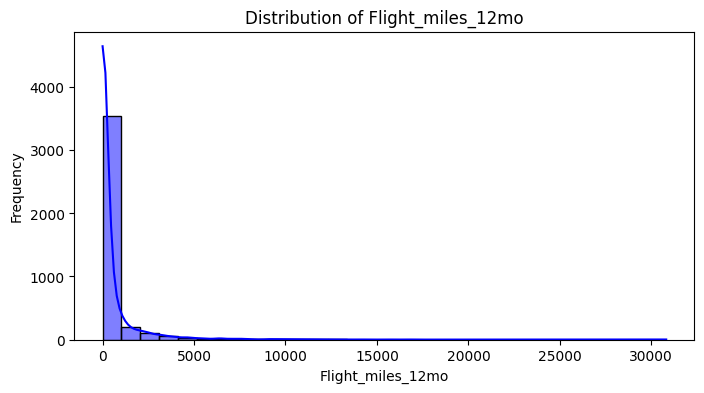

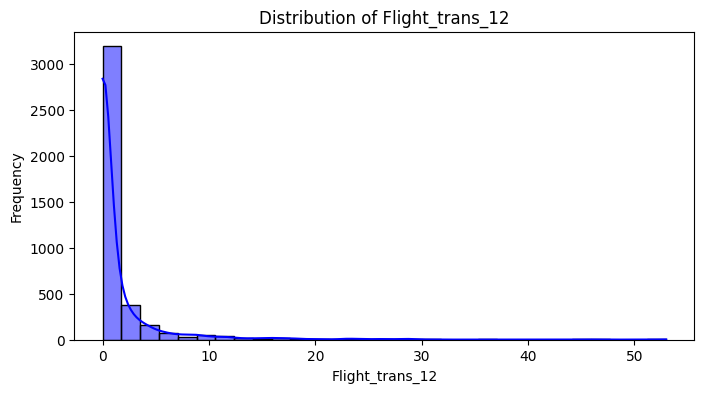

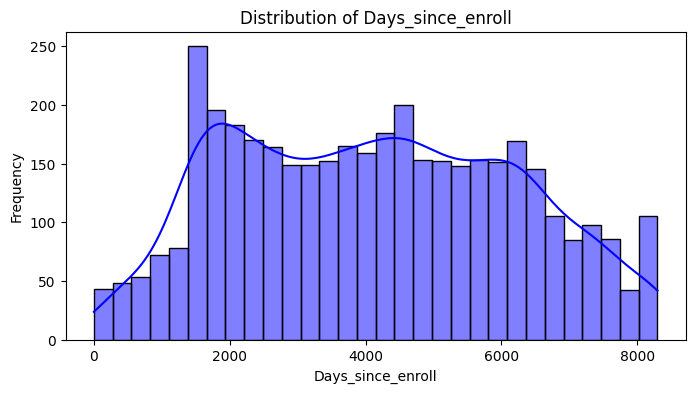

In [ ]:
# Plot the distribution of numerical columns
numerical_cols = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans',
                  'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

# Plot using Seaborn
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

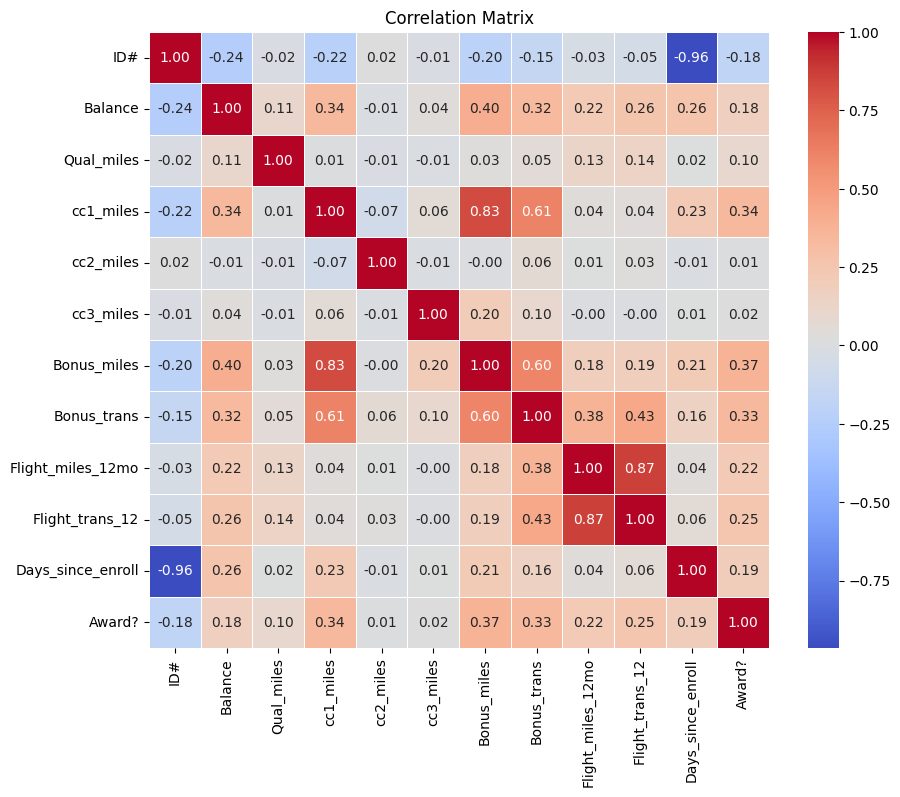

In [ ]:
# Calculate and plot correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

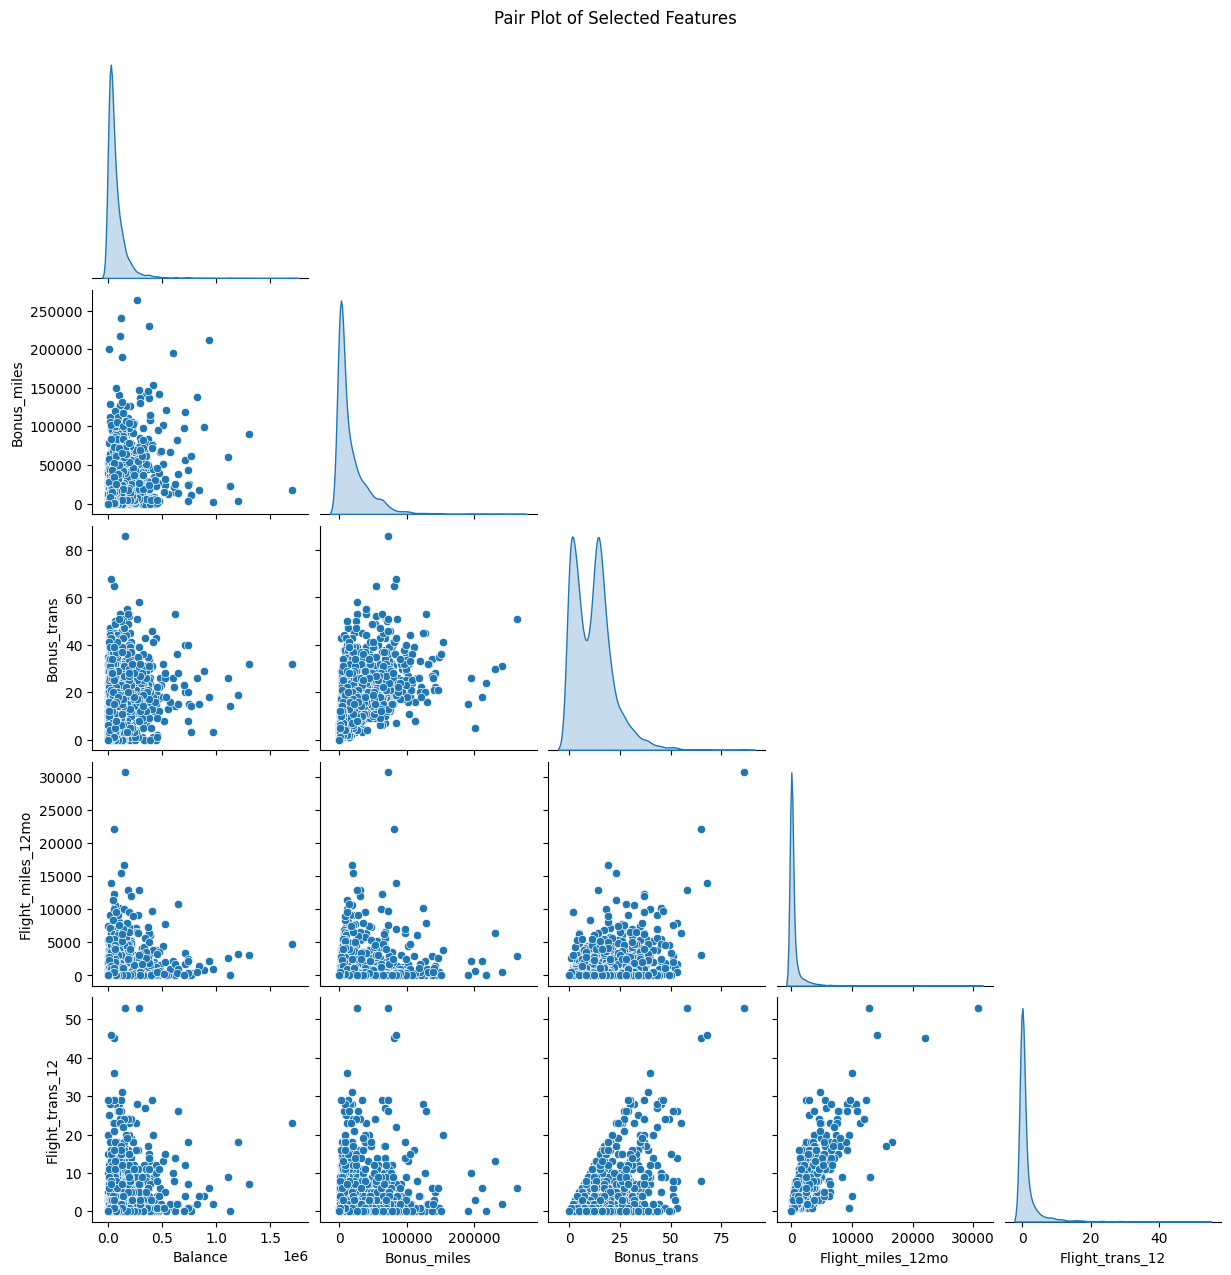

In [ ]:
# Pair plot for a subset of numerical columns
selected_cols = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']
sns.pairplot(df[selected_cols], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


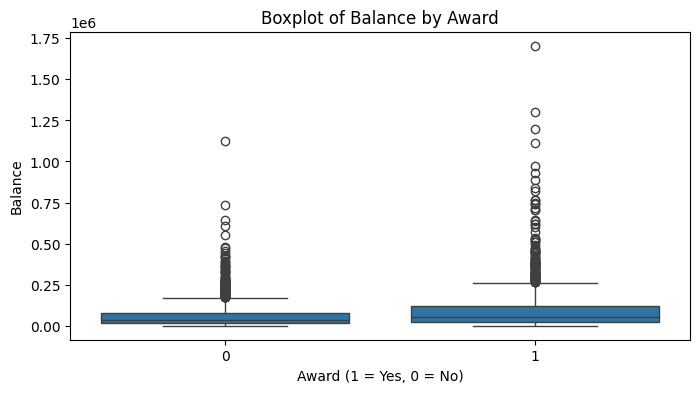

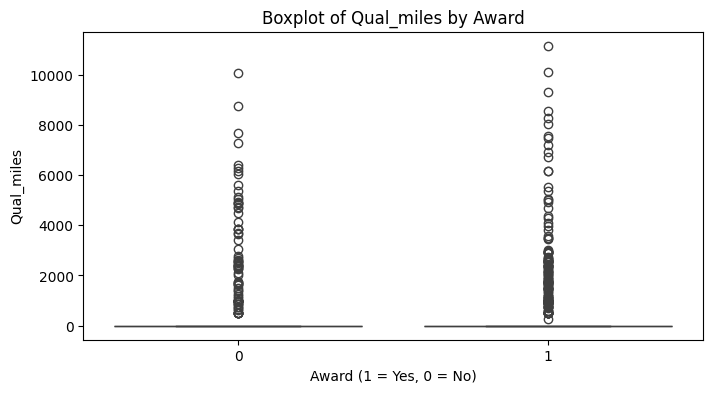

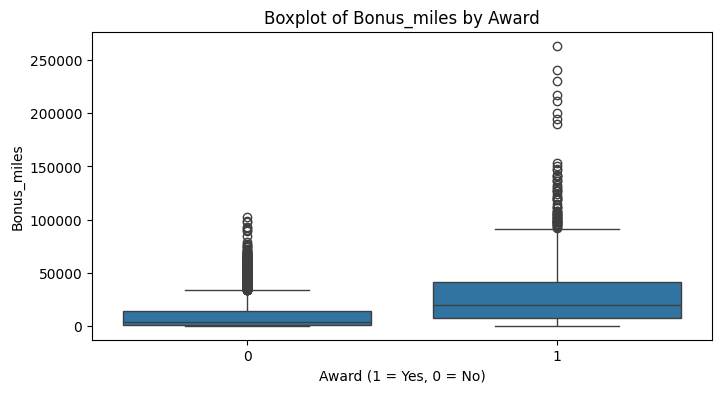

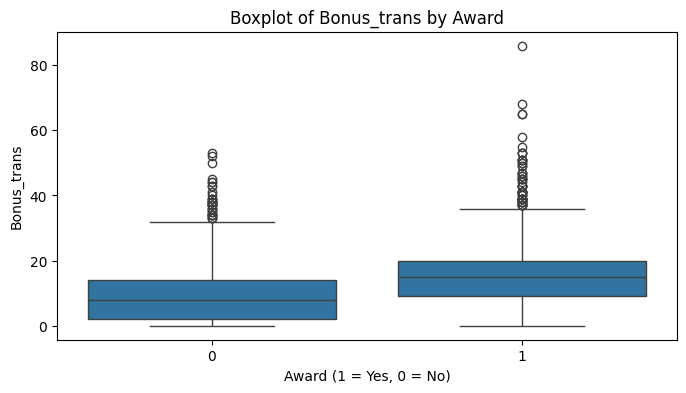

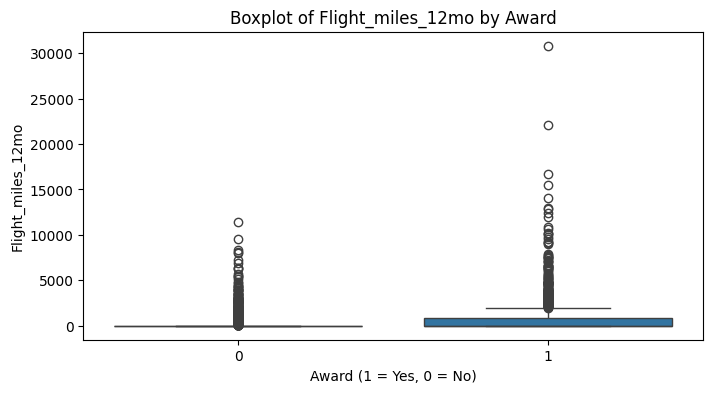

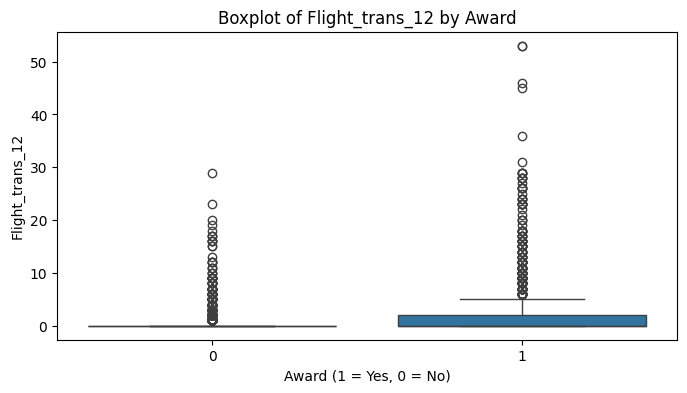

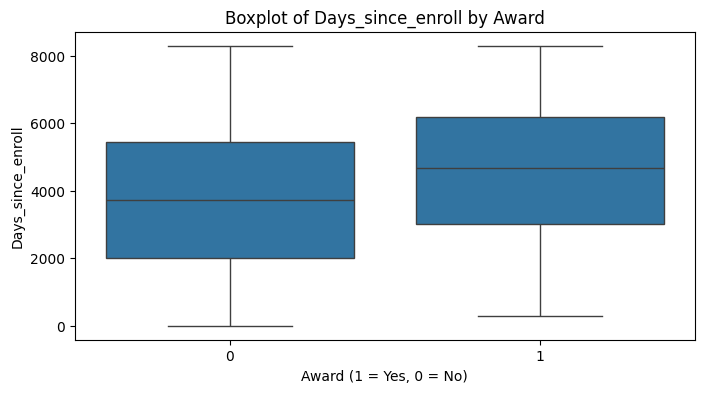

In [ ]:
# Boxplots for numerical features grouped by 'Award?' to explore potential clusters
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Award?', y=col, data=df)
    plt.title(f"Boxplot of {col} by Award")
    plt.xlabel('Award (1 = Yes, 0 = No)')
    plt.ylabel(col)
    plt.show()


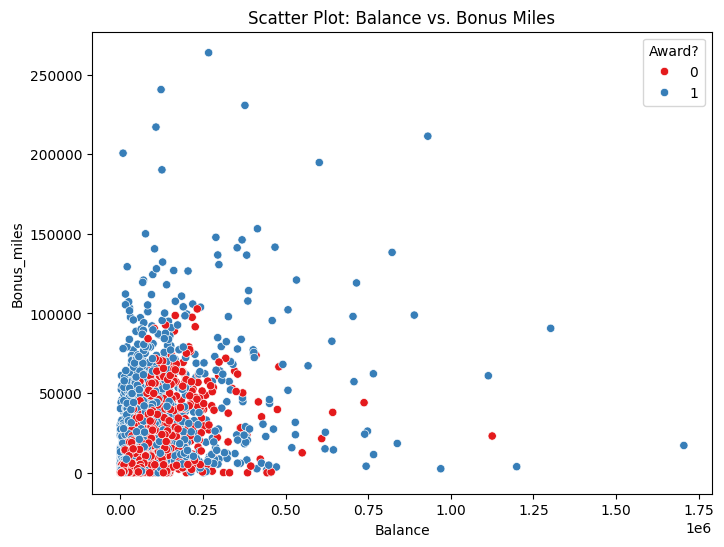

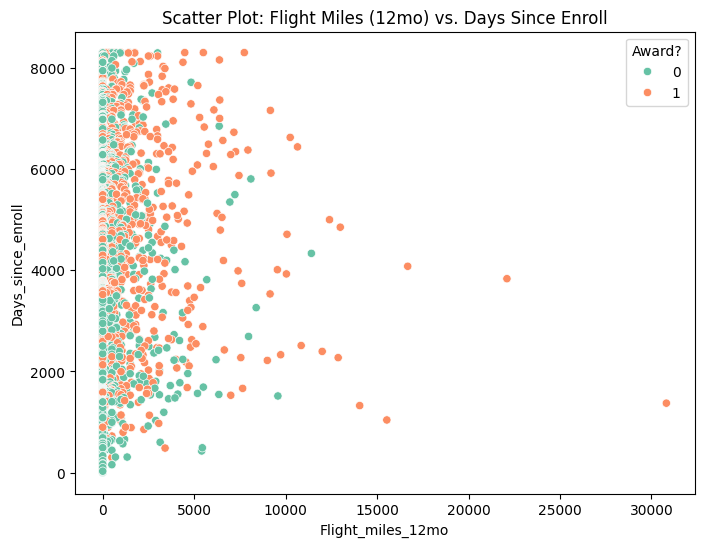

In [ ]:
# Scatter plots for features likely to form clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='Award?', palette='Set1')
plt.title("Scatter Plot: Balance vs. Bonus Miles")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Flight_miles_12mo', y='Days_since_enroll', hue='Award?', palette='Set2')
plt.title("Scatter Plot: Flight Miles (12mo) vs. Days Since Enroll")
plt.show()

**Standardize Features (Scaling):**

In [ ]:
# Standardizing the data
features = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
X = df[features]

# Standardize the data (important for K-Means and DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Checking the scaled data
pd.DataFrame(X_scaled, columns=features).head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.083121,1.499394,1.154932,0.692490,1.363975


**K-Means Clustering:**

**a) Elbow Method to Determine Optimal K:**

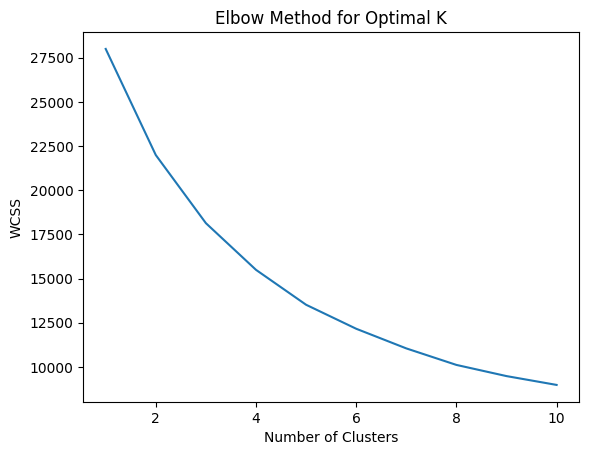

In [ ]:
# Elbow Method to find the optimal K value
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**b) Fit K-Means with the Optimal K:**

In [ ]:
# Fit K-Means with K=4 (assuming we chose 4 based on the elbow method)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

# Adding the K-Means labels to the original data
df['KMeans_Cluster'] = kmeans_labels

Silhouette Score for K-Means: 0.31589735344168157


**Hierarchical Clustering:**

**a) Dendrogram to Find Optimal Clusters:**

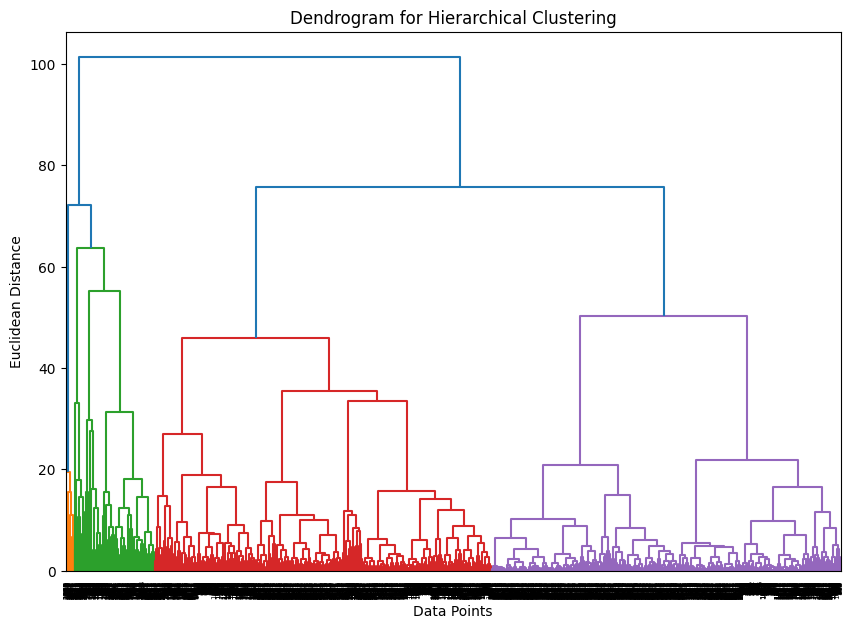

In [ ]:
# Linkage for Hierarchical Clustering (using 'ward' linkage)
linked = linkage(X_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

**b) Fit Agglomerative Clustering:**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Fit AgglomerativeClustering with 4 clusters (chosen from the dendrogram)
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

# Silhouette Score
silhouette_agg = silhouette_score(X_scaled, agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agg}')

# Adding the Agglomerative labels to the original data
df['Agglomerative_Cluster'] = agg_labels


Silhouette Score for Agglomerative Clustering: 0.2115182483881854


**DBSCAN (Density-Based Spatial Clustering):**

**a) DBSCAN Implementation:**


In [ ]:
# Fit DBSCAN (tuning epsilon and minPts)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Silhouette Score for DBSCAN (it might be undefined for noise points, which are labeled as -1)
if len(set(dbscan_labels)) > 1:  # Silhouette score only makes sense if more than 1 cluster exists
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print('Silhouette Score for DBSCAN cannot be computed because only one cluster was formed.')

# Adding DBSCAN labels to the original data
df['DBSCAN_Cluster'] = dbscan_labels

Silhouette Score for DBSCAN: -0.013171408980990671


 **Cluster Visualizations:**

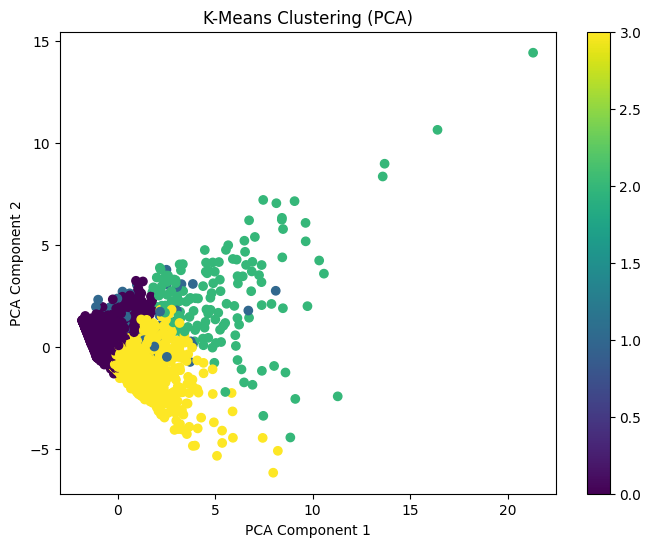

In [ ]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

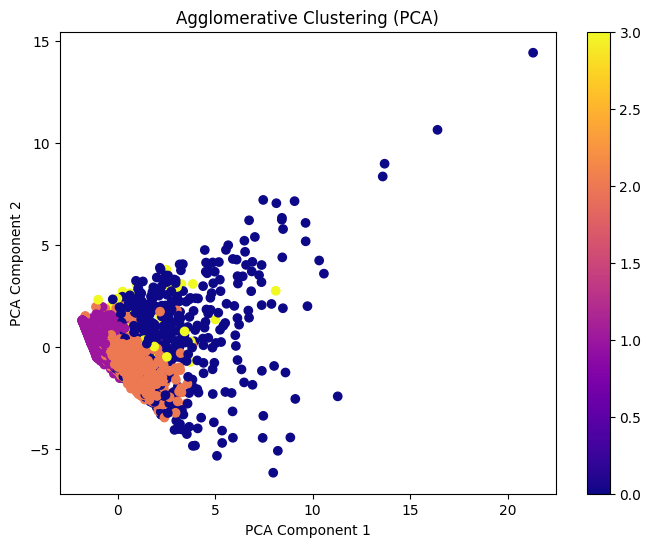

In [ ]:
# Plotting Agglomerative Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='plasma')
plt.title('Agglomerative Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

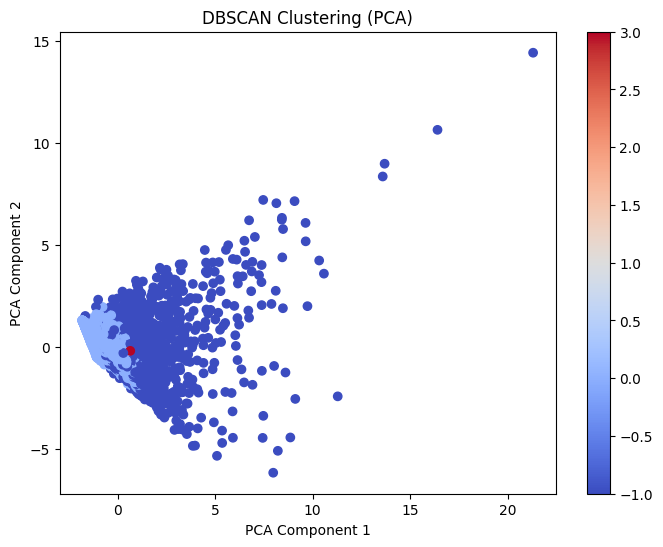

In [ ]:
# Plotting DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='coolwarm')
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# **Summary of the Analysis:**


*   Cluster Interpretation: Each algorithm clusters the data differently. K-Means provides fixed clusters, Agglomerative offers hierarchical relationships, and DBSCAN identifies dense regions but may classify points as noise.

*   Visualization: PCA visualization helps confirm the clusters and their separation. The clustering algorithms should show distinct areas in the PCA plot.

*   Evaluation: Silhouette scores serve as a primary internal evaluation metric. Higher scores indicate that the clusters are well-separated and meaningful. DBSCAN may not always have a valid score due to noise points, but it is still valuable for detecting non-globular clusters.




